## 4. Modelling GW well data using a MLP approach

In [9]:
## First, lets import all neeeded libraries

import os, sys
# import netCDF4
import pandas as pd
#import datetime
#from datetime import date, datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import geopandas as gpd
import rioxarray
import xarray as xr
import glob, shutil

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
from io import StringIO
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import math
from math import sqrt

In [3]:
pwd = os.getcwd()
print(pwd)

/Users/marie-christineckert/Nextcloud/TU/Lehre/AktuelleAnwendungen_SoSe24/7_GW_Model_Example


### 1. Create train and test data in resp. subdirectories

In [4]:
# Create directories for train and test data
train_dir = 'data/HYRAS_GWData_csv/train'
test_dir = 'data/HYRAS_GWData_csv/test'

if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(test_dir):
    os.makedirs(test_dir)



In [5]:
# Load multiple CSV files
csv_files = glob.glob('data/HYRAS_GWData_csv/*.csv')  # Adjust the pattern as needed

In [6]:
# Split the CSV files into training and testing sets
train_files, test_files = train_test_split(csv_files, test_size=0.3, random_state=42)


In [7]:

# Copy files to train and test directories
for f in train_files:
    shutil.copy(f, train_dir)

for f in test_files:
    shutil.copy(f, test_dir)

### 2. Read Training/ Test Data

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [11]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
csv_files = glob.glob('data/HYRAS_GWData_csv/train/*.csv')

for file in csv_files:
    data = pd.read_csv(file, skipinitialspace=True).drop(['Unnamed: 0'], axis=1)
   # data = data.dropna(axis=0, inplace=True)
    
    #split dataset in features and target variable
    feature_cols = ['pr', 'tas']
    X = data[feature_cols] # Features
    y = data.GWL # Target variable

    model.fit(X, y, epochs=10)


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.0000e+00 - loss: -477.2607
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.0000e+00 - loss: -6041.9941
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.0000e+00 - loss: -35091.8633
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.0000e+00 - loss: -149765.0781
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.0000e+00 - loss: -490230.8750
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.0000e+00 - loss: -1301173.2500
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.0000e+00 - loss: -3025858.7500
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.0000e+00 - loss: -6016249.0000
Epoch 9/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.0000e+00 - loss: -11281836.0000
Epoch 10/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.0000e+00 - loss: -19838670.0000
Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,501 (197.27 KB)

 Trainable params: 16,833 (65.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,668 (131.52 KB)

### 1. Read data from previous script

Quick reminder on what we did in the previous script. We clipped the .nc file to AOI and stacked .nc files for specific years into one. We then extracted climate data at a specific locations, merged them with GW level data and saved the data for each well location as one singular csv file. These files are now the bassis for our model building.

Our next step is model buidling. We will first do it for one singular csv file exemplary, prior to feeding all data into one model:

In [4]:
data = pd.read_csv("./data/HYRAS_GWData_csv/27381010_weeklyData_HYRAS_GWData.csv", skipinitialspace=True).drop(['Unnamed: 0'], axis=1)

data.shape[0]

835

In [5]:
col2use = ['pr', 'tas', 'GWL']

In [6]:
#data = data.replace(np.inf, np.nan)
data.isnull().sum()

Date      0
pr        0
tas       0
GWL     380
dtype: int64

In [7]:
## although there are wuite a few NA values
## for the sake of simplicity we will drop NA values for now:

data.dropna(axis=0, inplace=True)
data

## later we might want to use imputation methods, or play around with the TS length in the preprocessing part

,Date,pr,tas,GWL
380,1997-04-14,1.200000,4.600000,48.520
381,1997-04-21,0.100000,7.671429,48.535
382,1997-04-28,15.000000,11.157143,48.550
383,1997-05-05,31.000000,9.885714,48.590
384,1997-05-12,11.000000,15.942857,48.550
...,...,...,...,...
830,2005-11-28,5.700000,0.357143,48.290
831,2005-12-05,3.200000,2.942857,48.290
832,2005-12-12,27.800000,3.200000,48.280
833,2005-12-19,14.300000,3.485714,48.270


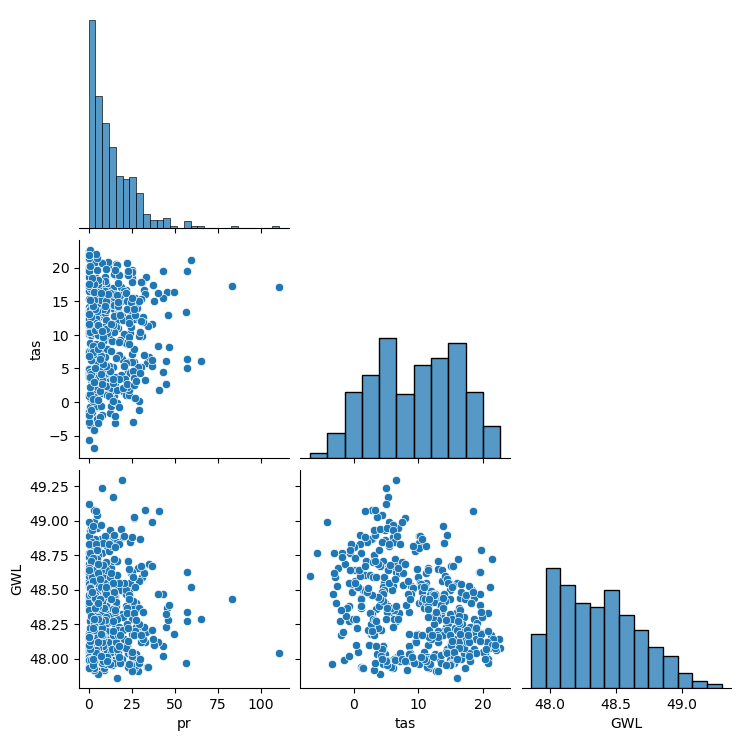

In [8]:
sns.pairplot(data[col2use], corner=True)
plt.show()

Ok we already know what to do here: 

### 2. Train-test splitting

In [10]:
#split dataset in features and target variable
feature_cols = ['pr', 'tas']
X = data[feature_cols] # Features
y = data.GWL # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


### 3. Apply feature scaling

Remember the feature scaling function we defined in the script about linear regression. We will simply reuse them for each column individually:

In [11]:
def min_max(variable):
        xmin, xmax = variable.min(), variable.max()
        min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
        return min_max_done
    
def log_transform(min_max_variable):
    return np.log(min_max_variable/(1-min_max_variable))

# backtransform
## reverse min max und perform exp()
def inv_logit(xmin, xmax, logit_transf_variable, orig_feature):
    xmin, xmax = orig_feature.min(), orig_feature.max()
    return (xmin-1)+(xmax-xmin+2)*np.exp(logit_transf_variable)/(1+np.exp(logit_transf_variable))

In [12]:
X_train_log = log_transform(min_max(X_train))

y_train_log = log_transform(min_max(y_train))

X_test_log = log_transform(min_max(X_test))

y_test_log = log_transform(min_max(y_test))

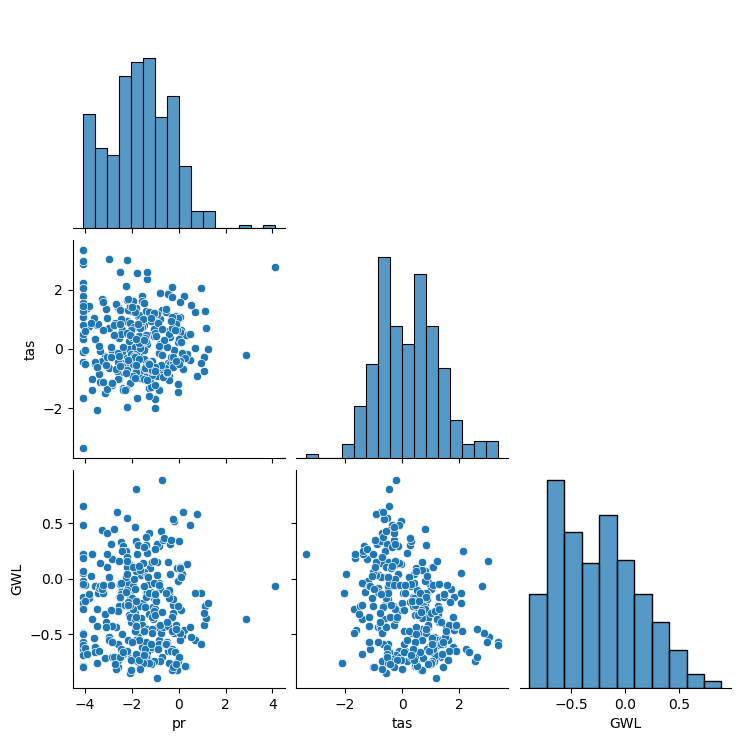

In [13]:
sns.pairplot(pd.concat([X_train_log, y_train_log], axis = 1), corner=True)
plt.show()

### 4. Initial MLP set up


We will now read all csv files into one pd.DataFrame, by appending the rows. We can ignore the date column, as it does not add valueable information to our RF model. Training a single model requires leveraging all the data, therefore we need to:

  **1.** Load each CSV file individually and treat each one as a separate sample.
  
  **2.** Prepare the data for training (feature engineering and target variable) for each sample --> feature scaling
  
  **3.** Combine the processed data into a single DataFrame for model training.
  
  **4.** Split the combined data into training and testing sets.
  
  **5.** Train the Random Forest Regressor on the combined dataset.
  
  **6.** Evaluate the model.

#### Step 1 -3: Looping through all files and combine into single DataFrame

In [22]:
pwd = os.getcwd()
print(pwd)

/Users/marie-christineckert/Nextcloud/TU/Lehre/Advanced/7_GW_Model_Example


In [25]:
# Load multiple CSV files
csv_files = glob.glob('data/HYRAS_GWData_csv/*.csv')  # Adjust the pattern as needed

In [52]:
# Prepare a list to hold the processed DataFrames
processed_samples = pd.DataFrame()

for file in csv_files:
    df = pd.read_csv(file, skipinitialspace=True).drop(['Unnamed: 0', "Date"], axis=1)
    
    # Combine all processed samples into a single DataFrame
    processed_samples = pd.concat([processed_samples,df], axis=0)



#### Step 4: Split into Training and Test Data

In [54]:
processed_samples

,pr,tas,GWL
0,1.300000,-0.728571,8.870
1,3.200000,3.871429,8.860
2,11.800000,6.185714,8.860
3,27.400000,5.742858,8.880
4,5.000000,6.057143,8.900
...,...,...,...
830,5.700000,0.357143,51.960
831,3.200000,2.942857,51.980
832,27.800000,3.200000,51.930
833,14.300000,3.485714,51.990


In [57]:
# Separate features and target
X = processed_samples.drop(columns=['GWL'])
y = processed_samples['GWL']

In [59]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 5: Train initial Model

In [64]:
# Initialwert und Anzahl der Bäume für den Random Forest festlegen
seed = 196
n_estimators = 750

# RandomForest erstellen, X und y definieren und Modell trainieren
model = RandomForestRegressor(n_estimators = n_estimators, random_state = seed, max_features = 1.0,
                               min_samples_split = 2, min_samples_leaf = 1, max_depth = None)
model.fit(X_train_log, y_train_log)

RandomForestRegressor(n_estimators=750, random_state=196)

In [65]:
# Mittelwert der quadrierten Residuen und erklärte Varianz ausgeben lassen
print(f"Mean of squared residuals: {model.score(X_train_log, y_train_log)}")
print(f"% Var explained: {model.score(X_train_log, y_train_log) * 100}")


Mean of squared residuals: 0.8445261443733946
% Var explained: 84.45261443733946


In [62]:
# DAUERT 2-3 Minuten!
# Liste und Schleife für die Durchführung des Models mit unterschiedlichen Anzahlen an Bäumen erstellen
n_estimators_range = list(range(2, 2001, 50))
errors = []
oob_error =  []

for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators = n_estimators, random_state = seed, oob_score = True)
    model.fit(X_train_log, y_train_log)
    errors.append(model.score(X_train_log, y_train_log))
    oob_error.append(1- model.oob_score_)
  #  mse = mean_squared_error(labels, y_pred)
#    mse_scores.append(mse)

/opt/anaconda3/envs/lehre/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


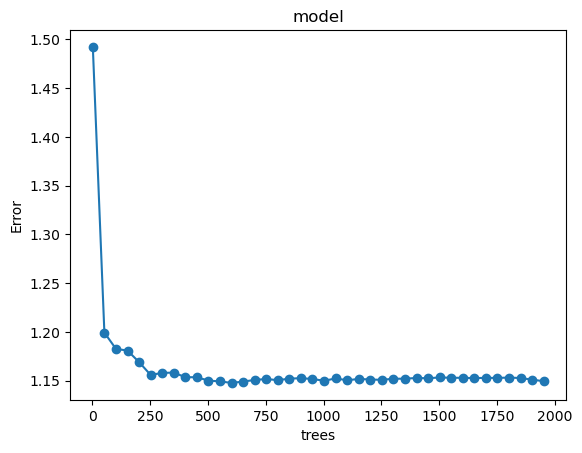

In [17]:
# Importieren von Modulen/Bibliotheken
import matplotlib.pyplot as plt

# Plotten der error-Werte in Abhängigkeit der Anzahl der Bäume des Random Forests, um optimalen n_estimators-Wert festzulegen
plt.plot(n_estimators_range, oob_error, marker = 'o')
plt.xlabel('trees')
plt.ylabel('Error')
plt.title('model')
plt.show()

Result stabilize after roughly 600 trees.

In [63]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 1952,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 196,
 'verbose': 0,
 'warm_start': False}

In [19]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(8,8,), activation="relu", alpha=0.0001, batch_size=200, max_iter=200, random_state=0)

In [20]:
mlp.fit(X_train_log, y_train_log)

MLPRegressor(batch_size=200, hidden_layer_sizes=(8, 8), random_state=0)

Text(0, 0.5, 'Loss')

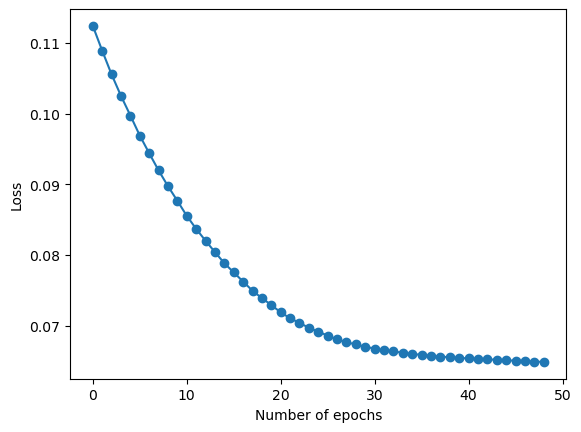

In [21]:
plt.plot(mlp.loss_curve_, marker='o')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")

In [ ]:
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, mlp.predict(X_test))

In [ ]:
from sklearn.model_selection import cross_val_score
scores = - cross_val_score(estimator=mlp, X=X_train_log, y=y_train_log, cv=10, scoring='neg_mean_squared_error', n_jobs=1)
print(scores)
print(np.mean(scores), np.std(scores))

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=mlp,
                                                        X=X_train_log,
                                                        y=y_train_log,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10,
                                                        scoring='neg_mean_squared_error',
                                                        n_jobs=1)
train_scores = - train_scores
test_scores = - test_scores

In [ ]:
# calculate mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes,
         train_mean,
         marker='o',
         label='Training RMSE')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.25)
plt.plot(train_sizes,
         test_mean,
         linestyle='dashed',
         marker='s',
         label='Validation RMSE')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.25)
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('RMSE')
plt.legend(loc='upper right')

In [ ]:
from sklearn.model_selection import validation_curve

layouts = [(8, 8,), (8, 4,), (80,60,40), (100,), (100, 50, 25,)]

train_scores, test_scores = validation_curve(estimator=mlp,
                                             X=X_train_log,
                                             y=y_train_log,
                                             param_name='hidden_layer_sizes',
                                             param_range=layouts,
                                             cv=10,
                                             scoring='neg_mean_squared_error')

train_scores = - train_scores
test_scores = - test_scores

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

layout = [1, 2, 3, 4, 5]
plt.plot(layout,
         train_mean,
         marker='o',
         color='blue',
         linestyle='None',
         label='Training RMSE')
plt.errorbar(layout,
             train_mean,
             train_std,
             train_std,
             capsize=5,
             color='blue',
             linestyle='None')
plt.plot(layout,
         test_mean,
         marker='s',
         color='red',
         linestyle='None',
         label='Validation RMSE')
plt.errorbar(layout,
             test_mean,
             test_std,
             test_std,
             capsize=5,
             color='red',
             linestyle='None')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('Layout number')
plt.ylabel('RMSE')
plt.xticks(layout)
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve

activations = ["identity", "logistic", "tanh", "relu"]

train_scores, test_scores = validation_curve(estimator=mlp,
                                             X=X_train_log,
                                             y=y_train_log,
                                             param_name='activation',
                                             param_range=activations,
                                             cv=10,
                                             scoring='neg_mean_squared_error')

train_scores = - train_scores
test_scores = - test_scores

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

activation = [1, 2, 3, 4]
plt.plot(activation,
         train_mean,
         marker='o',
         color='blue',
         linestyle='None',
         label='Training RMSE')
plt.errorbar(activation,
             train_mean,
             train_std,
             train_std,
             capsize=5,
             color='blue',
             linestyle='None')
plt.plot(activation,
         test_mean,
         marker='s',
         color='red',
         linestyle='None',
         label='Validation RMSE')
plt.errorbar(activation,
             test_mean,
             test_std,
             test_std,
             capsize=5,
             color='red',
             linestyle='None')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('Activation function')
plt.ylabel('RMSE')
plt.xticks(activation)
plt.show()